In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap
import matplotlib.patches as mpatches
from matplotlib.path import Path

In [2]:
# variables
path_excel = r'data.xlsx'
sheetname = 'component_compare'
dpi = 700
file_path = r'images/Figure4 component_compare.pdf'

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 14

title = 'The comparison for each component between Narok town and the CACTUS database'
xlabel = 'CACTUS Components (the number of datapoints in the database) except Narok and components in Narok town'
ylabel = 'Total Annualised Cost per Household\n(TACH) Int$ (2020)'

colors = [
    '#FFD580', # light orange color
    '#90EE90', # light green color
]

<function matplotlib.pyplot.show(close=None, block=None)>

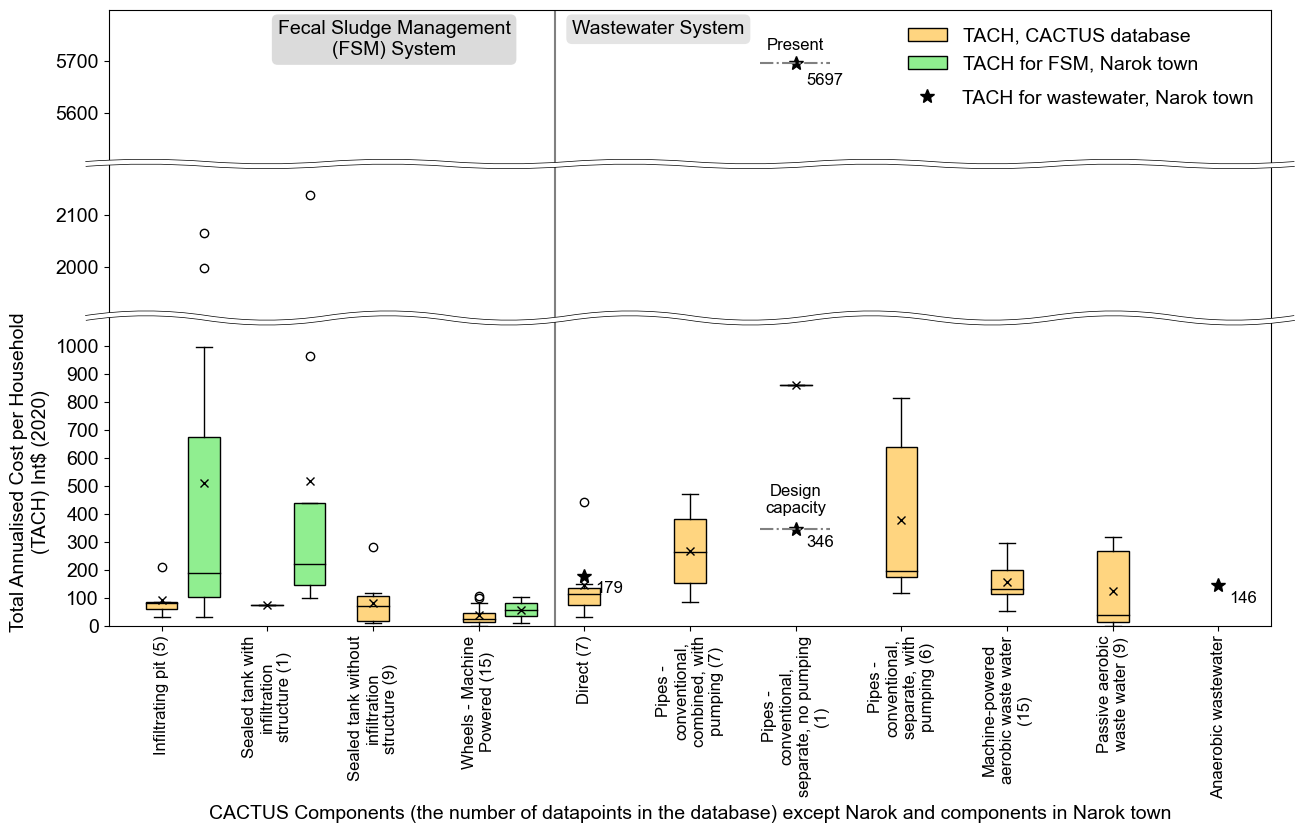

In [6]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 8), sharex='col',
                       gridspec_kw={'height_ratios': (1, 1, 2)} )

fig.patch.set_facecolor('white') # 背景色を「白」に設定

df = pd.read_excel(path_excel, sheet_name=sheetname)

groups = df.groupby('component', sort=False)
group_labels = [f"{label}" if label == 'Anaerobic wastewater' else f"{label} ({size})" for label, size in groups.size().items()]

for index, ax in enumerate(axs):

    data = [group[1]['tach'] for group in groups]

    bp = ax.boxplot(
        data, 
        showmeans=True, 
        patch_artist=True,
        boxprops={'linestyle': '-'},
        whiskerprops={'linestyle': '-'},
        capprops={'linestyle': '-'},
        meanprops = {'marker': 'x', 'markerfacecolor': 'k', 'markeredgecolor':'k', 'markersize': 6},
        widths=0.3
    )
    
    for box in bp['boxes']:
        box.set_facecolor(colors[0])
    
    # make median line black
    for median in bp['medians']:
        median.set_color('black')
    
    fsm_data_x = [1.4, 2.4, 4.4]
    fsm_data_y = [
        [
            2066.149763,
            32.34512299,
            38.02926996,
            259.0633762,
            540.0144898,
            1997.755788,
            138.7364657,
            236.7464247,
            668.4024062,
            109.1455642,
            695.4619645,
            108.0757478,
            79.18748802,
            138.7598266,
            995.5549447,
            85.55645144,
        ], # infiltrating pit
        [
            338.0584152,
            140.3223123,
            2139.474319,
            440.5962955,
            145.9034235,
            158.8486299,
            101.0300832,
            964.1762301,
            222.9031357,
        ], # median value - Sealed tank with infiltration structure
#         11, 104, # Wheels - Machine Powered
        [
            11.17640888,
            104.1644814
        ], # median value - Wheels - Machine Powered
    ]
    
    bp2 = ax.boxplot(
        fsm_data_y, 
        positions=fsm_data_x,
        patch_artist=True,
        boxprops={'linestyle': '-',},
        whiskerprops={'linestyle': '-'},
        capprops={'linestyle': '-'},
#         boxprops={'linestyle': '--'},
#         whiskerprops={'linestyle': '--'},
        showmeans=True, 
        meanprops = {'marker': 'x', 'markerfacecolor': 'k', 'markeredgecolor':'k', 'markersize': 6, },
        widths=0.3
    )
    
    for box in bp2['boxes']:
        box.set_facecolor(colors[1])
        
    for median in bp2['medians']:
        median.set_color('black')
    
    sewer_data_x = [5, 7, 7, 11]
    sewer_data_y = [
        179, # Direct
        346, 5697, # Pipes - conventional, separate, no pumping
        146 # Anaerobic wastewater
    ]
    
    ax.plot(sewer_data_x, sewer_data_y, '*', label="TACH for wastewater, Narok town", markersize=10, color='k')
    
    for j, x in enumerate(sewer_data_x):
        value = sewer_data_y[j]
        if index == 0:
            if value < 5000:
                continue
        elif index == 1:
            continue
        else:
            if value > 5000:
                continue
        ax.text(x + 0.1, value - 20, f"{value:.0f}", ha='left', va='top', fontsize=12)
    
    # add vertial line to separate FSM and Sewage
    for i in range(len(df)-1):
        if i == 4:
            ax.axvline(i + 0.72, color='grey', linestyle='-', alpha=1)
        
fig.subplots_adjust(hspace=0.0)  

# 下段サブプロット
axs[2].set_ylim(0,1100)
axs[2].set_yticks(np.arange(0,1100,100))
xtick_labels = [ '\n'.join(textwrap.wrap(label, 20)) for label in group_labels ]
axs[2].set_xticks(np.arange(len(xtick_labels)) + 1)
axs[2].set_xticklabels(xtick_labels, rotation=90, ha='center', fontsize=12)

# 中段サブプロット
axs[1].set_ylim(1900,2200)
axs[1].set_yticks(np.arange(2000,2200,100))

# 上段サブプロット
axs[0].set_ylim(5500,5800) 
axs[0].set_yticks(np.arange(5600,5800,100))

# 下段のプロット領域上辺を非表示
axs[2].spines['top'].set_visible(False)

# 中段のプロット領域上辺を非表示
axs[1].spines['top'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 


# 上段のプロット領域底辺を非表示、X軸の目盛とラベルを非表示
axs[0].spines['bottom'].set_visible(False)
axs[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False) 


axs[0].legend(handles=[
    mpatches.Patch(facecolor=colors[0], edgecolor='black', linestyle='-', label='TACH, CACTUS database'),
    mpatches.Patch(facecolor=colors[1], edgecolor='black', linestyle='-', label='TACH for FSM, Narok town'),
], loc='upper right', bbox_to_anchor=(0.952, 1.0), frameon=False)
axs[1].legend(loc="upper right", bbox_to_anchor=(1.0, 1.6), frameon=False)


## ニョロ線の描画
d1 = 0.02 # X軸のはみだし量
d2 = 0.03 # ニョロ波の高さ
wn = 21   # ニョロ波の数（奇数値を指定）

pp = (0,d2,0,-d2)
px = np.linspace(-d1,1+d1,wn)
py = np.array([1+pp[i%4] for i in range(0,wn)])
p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))

line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                          facecolor='None', clip_on=False,
                          transform=axs[2].transAxes, zorder=10)

line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                           facecolor='None', clip_on=False,
                           transform=axs[2].transAxes, zorder=10,
                           capstyle='round')

a = axs[2].add_patch(line1)
a = axs[2].add_patch(line2)


line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                          facecolor='None', clip_on=False,
                          transform=axs[1].transAxes, zorder=10)

line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                           facecolor='None', clip_on=False,
                           transform=axs[1].transAxes, zorder=10,
                           capstyle='round')

a = axs[1].add_patch(line1)
a = axs[1].add_patch(line2)

axs[0].axhline(y=5697,xmin=0.56, xmax=0.62, color='grey', linestyle='-.', alpha=1)
axs[2].axhline(y=346,xmin=0.56, xmax=0.62, color='grey', linestyle='-.', alpha=1)

# axs[0].set_title(title, loc='center', x=0.5, y=1.03, fontsize=14)
axs[2].set_ylabel(ylabel, fontsize=14)
axs[2].set_xlabel(xlabel, fontsize=14)

axs[0].text(3.2, 5780, 'Fecal Sludge Management\n(FSM) System', fontsize=14, ha='center', va='top', bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.8, boxstyle='round'))
axs[0].text(5.7, 5780, 'Wastewater System', fontsize=14, ha='center', va='top', bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.6, boxstyle='round'))

axs[0].text(7, 5730, 'Present', fontsize=12, ha='center', va='center')
axs[2].text(7, 450, 'Design\ncapacity', fontsize=12, ha='center', va='center')

# axs[1].text(1.4, 2100, 'Narok town', fontsize=12, ha='center', va='center')
# axs[0].text(2.5, 5550, 'Narok town', fontsize=12, ha='center', va='center')
# axs[2].text(4.4, 300, 'Narok\ntown', fontsize=12, ha='center', va='center')

plt.savefig(file_path, format="pdf", dpi=dpi, transparent=True, bbox_inches='tight')
plt.savefig(f"{file_path}.png", format="png", dpi=dpi, transparent=True, bbox_inches='tight')
plt.show